# Решение нелинейных уравнений

Библиотека scipy содержит эффективные методы решения нелинейных уравнений, например, метод [fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html). Входными параметрами этой процедуры является функция, ноль которой мы ищем, и начальное приближение для нуля. Так, воспользуемся этой функцией для поиска решения уравнения $f(x)=2-x-e^{-x}=0$: 

In [10]:
from scipy.optimize import fsolve
from numpy import exp

def f(x):
    return 2-x-exp(-x)

ans = fsolve(f,1)
print('Численное решение: ', ans)

Численное решение:  [1.84140566]


## Метод итераций (метод последовательных приближений)

Уравнение вида $x = 2 - e^{-x}$ не имеет аналитического решения. Одним из простейших прямолинейных методов решения является метод простых итераций. На первом шаге задаем начальное приближение корня уравнения, например, $x^{(0)} = 1$, затем в цикле вычисляем последовательные значения $x^{(1)}, x^{(2)}, ..., x^{(N)}$. Последовательность $x^{(i)}$ сходится к неподвижной точке, которая является корнем исходного уравнения 1.8414056.

In [14]:
import numpy as np 
N = 11 
x = np.empty(N, float)
x[0] = 1.
for i in range(N-1):
    x[i+1] = 2 - exp(-x[i])
    print(x[i+1])

1.6321205588285577
1.8044854658474119
1.8354408939220457
1.8404568553435368
1.841255113911434
1.8413817828128696
1.8414018735357267
1.8414050598547234
1.8414055651879888
1.8414056453310121


Процесс сходимости решения можно изобразить графически. Корень уравнения является точкой пересечения прямой $y=x$ и экспоненты $y = 2 - e^{-x}$. Красными точками на графике отмечены последовательные приближения корня. Начиная с $x^{(3)}$ точки сливаются в одну. 

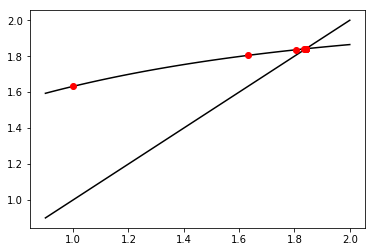

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
t = np.linspace(0.9,2,100)
plt.plot(t,t,color='black')
plt.plot(t,2-exp(-t),color='black')
plt.plot(x[:N-1],x[1:N],'ro')
plt.show()

На основе полученных результатов постройте график сходимости корня, аналигичный следующему графику ![pic](https://sites.google.com/site/procesosnumericos0241/_/rsrc/1347471302671/fixed-point-method/3.png.1347471302528.png).

При использовании этого же подхода для решения уравнения $x = e^{1-x^2}$ с начальным приближением $x^{(0)} = 0.5$ результат не сходится к одной неподвижной точке, а колеблется между двумя положениями. В этом примере метод итераций не сходится.

In [2]:
import numpy as np 
N = 11 
x = np.empty(N, float)
x[0] = 0.5
for i in range(N-1):
    x[i+1] = exp(1-x[i]*x[i])
    print(x[i+1])

NameError: name 'exp' is not defined

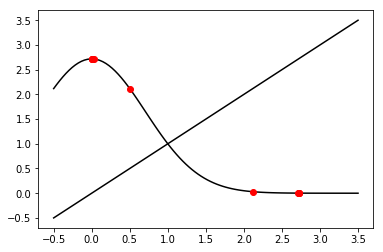

In [30]:
t = np.linspace(-0.5,3.5,100)
plt.plot(t,t,color='black')
plt.plot(t,exp(1-t*t),color='black')
plt.plot(x[:N-1],x[1:N],'ro')
plt.show()

При помощи метода простых итераций определите корень уравнения $x = \sqrt{1-\log x}$ с начальным приближением $x^{(0)} = 0.5$ и изобразите процесс сходимости графически. Сравните результат с расчетом функции fsolve.

Рассмотрим уравнение $x = 1-e^{-cx}$, где $c$ - известный параметр, а $x$ - неизвестная величина. Такое уравнение может получается в различных ситуациях: физика производства серной кислоты, математическая модель эпидемий, теории случайных графов, [теории перколяции](https://ru.wikipedia.org/wiki/%D0%9F%D0%B5%D1%80%D0%BA%D0%BE%D0%BB%D1%8F%D1%86%D0%B8%D1%8F).
- Напишите программу для решения такого уравнения методом итераций для случая $c = 2$. Получите ответ с точностью до $\varepsilon = 10^{-6}$.
- Проверьте результат при помощи функции fsolve.
- Измените программу таким образом, чтобы она определяла решение уравнения при различных значениях $c$ в диапозоне от 0 до 3 с шагом 0.01.
- Постройте график зависимости корня уравнения от параметра $x(c)$. 
- Получившаяся зависимость демонстрирует переход от режима с $x = 0$ к режиму с $ x \neq 0$, это пример фазового перехода, который в физике описывает [перколяционный переход](https://en.wikipedia.org/wiki/Percolation_threshold), в эпидемиологии - порог эпидемии.

In [6]:
c = np.arange(0,3.01,0.01)


## Метод дихотомии (бинарный поиск)

Напишите программу для решения нелинейного уравнения $5e^{-x}+x-5=0$ [методом половинного деления](http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%B5%D1%82%D0%BE%D0%B4%D1%8B_%D0%B4%D0%B8%D1%85%D0%BE%D1%82%D0%BE%D0%BC%D0%B8%D0%B8) с точностью $\varepsilon = 10^{-6}$. Проверьте результат с помощью функции fsolve.

In [1]:
def f(x):
    return 5.*np.exp(-x) + x - 5.

def binary(f,a,b):
    x = 0.5*(a+b)
    ...
    return x

## Ферромагнитизм

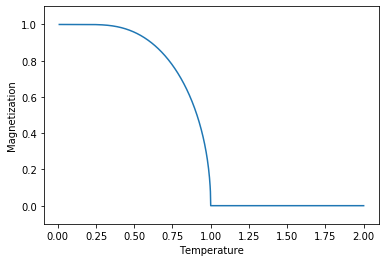

In [3]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show,ylim,xlabel,ylabel

# Constants
Tmax = 2.0
points = 1000
accuracy = 1e-6

# Set up lists for plotting
y = []
temp = linspace(0.01,Tmax,points)

# Temperature loop
for T in temp:
    m1 = 1.0
    error = 1.0

    # Loop until error is small enough
    while error>accuracy:
        m1,m2 = tanh(m1/T),m1
        error = abs((m1-m2)/(1-T*cosh(m2/T)**2))
    y.append(m1)

# Make the graph
plot(temp,y)
ylim(-0.1,1.1)
xlabel("Temperature")
ylabel("Magnetization")
show()

## Метод Ньютона

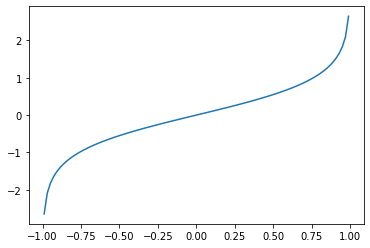

In [1]:
from math import tanh,cosh
from numpy import linspace
from pylab import plot,show

accuracy = 1e-12

def arctanh(u):
    x = 0.0
    delta = 1.0
    while abs(delta)>accuracy:
        delta = (tanh(x)-u)*cosh(x)**2
        x -= delta
    return x

upoints = linspace(-0.99,0.99,100)
xpoints = []
for u in upoints:
    xpoints.append(arctanh(u))
plot(upoints,xpoints)
show()

## Потенциал Букенгема

In [2]:
from math import exp,sqrt

# Constants
sigma = 1.0             # Value of sigma in nm
accuracy = 1e-6         # Required accuracy in nm
z = (1+sqrt(5))/2       # Golden ratio

# Function to calculate the Buckingham potential
def f(r):
    return (sigma/r)**6 - exp(-r/sigma)

# Initial positions of the four points
x1 = sigma/10
x4 = sigma*10
x2 = x4 - (x4-x1)/z
x3 = x1 + (x4-x1)/z

# Initial values of the function at the four points
f1 = f(x1)
f2 = f(x2)
f3 = f(x3)
f4 = f(x4)

# Main loop of the search process
while x4-x1>accuracy:
    if f2<f3:
        x4,f4 = x3,f3
        x3,f3 = x2,f2
        x2 = x4 - (x4-x1)/z
        f2 = f(x2)
    else:
        x1,f1 = x2,f2
        x2,f2 = x3,f3
        x3 = x1 + (x4-x1)/z
        f3 = f(x3)

# Print the result
print("The minimum falls at",0.5*(x1+x4),"nm")

The minimum falls at 1.630516067174875 nm
